## Project: Machine Learning For Predicting Kaggle Housing Prices


## Getting Started
In this project, there will be evaluated the performance and predictive of a dataset that is collected by kaggle. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [Kaggle House Prices Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). This playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. It has 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges to predict the final price of each home.


## Load Data


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit, train_test_split

# Pretty display for notebooks
%matplotlib inline

# Load the Kaggle housing dataset
data = pd.read_csv('train.csv')


## Data Exploration

This dataset is powerful with 79 features for each house. The data discription is detailed with every representation in the dataset. But this dataset is not very large with only 1460 data points in it which makes it takes only a small amount of time to fit the model. It is easy to use this for studying the machine learning techniques.

In this first section of this project, I will make a cursory investigation about the Kaggle housing data and provide my observations. There will include the shape of data the arithmetic aspect of the prices.
   

In [3]:
print("Kaggle housing dataset has {} data points with {} variables each.".format(*data.shape))

Kaggle housing dataset has 1460 data points with 81 variables each.


In [4]:
# Minimum price of the data
minimum_price = np.amin(data['SalePrice'])

# Maximum price of the data
maximum_price = np.amax(data['SalePrice'])

# Mean price of the data
mean_price = np.mean(data['SalePrice'])

# Median price of the data
median_price = np.median(data['SalePrice'])

# Standard deviation of prices of the data
std_price = np.std(data['SalePrice'])

# Show the calculated statistics
print("Statistics for housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for housing dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.19589041095
Median price $163000.0
Standard deviation of prices: $79415.29188606751


## Data processing

The Machine learning model learns features by comparing the numerical distances. However the string features do not contains numerical distances in it. Some of the string features imply the numerical sizes but some are not. In this part I replace those string features containing implied sizes with numbers. For other string I handle them with the one hot encoding method. Part of the string features only count towards 1% of the data or 99% of the data which make them less useful for the prediction because they are either too unique or too generalized.

#### Data translated into numerical digit
* Ex	Excellent
* Gd	Good
* TA	Average/Typical
* Fa	Fair
* Po	Poor
* NA    None

Another scale
*  Gd	Good Exposure
*  Av	Average Exposure (split levels or foyers typically score average or above)	
*  Mn	Mimimum Exposure
*  No	No Exposure
*  NA	No Basement
    
Translate them to Na:0 Po:1 Fa:2 TA:3 Gd:4 Ex:5 ; No:1 Mn:2 Av:3 

* Grvl  Gravel
* Pave  Paved
* NA    No allay access

Translate them to NA:0 Pave:1 Grvl:2

LotShape: General shape of property

 *   Reg	Regular	
 *   IR1	Slightly irregular
 *   IR2	Moderately Irregular
 *   IR3	Irregular

Translate them to IR3:1 IR2:2 IR1:3 Reg:4

HouseStyle: Style of dwelling

* 1Story	One story
* 1.5Fin	One and one-half story: 2nd level finished
* 1.5Unf	One and one-half story: 2nd level unfinished
* 2Story	Two story
* 2.5Fin	Two and one-half story: 2nd level finished
* 2.5Unf	Two and one-half story: 2nd level unfinished
* SFoyer    Split Foyer 
*   SLvl    Split Level

Translate them to 1Story:1 1.5Unf:1.3 1.5Fin:1.5 2Story:2 2.5Fin:2.3 SFoyer:0.5 SLvl:0.5

 *  GLQ	Good Living Quarters
 *  ALQ	Average Living Quarters
 *  BLQ	Below Average Living Quarters	
 *  Rec	Average Rec Room
 *  LwQ	Low Quality
 *  Unf	Unfinshed
 *  NA	No Basement

Translate them to GLQ:6 ALQ:5 BLQ:4 Rec:3 LwQ:2 Unf:1 NA:0


CentralAir: Central air conditioning (bollean)
 *  N	No
 *  Y	Yes

Translate them to N:0 Y:1

GarageFinish: Interior finish of the garage

 *  Fin	Finished
 *  RFn	Rough Finished	
 *  Unf	Unfinished
 *  NA	No Garage

Translate them to Unf:1 RFn:2 Fin:3

#### Data translated using one hot encoding method

MasVnrType: Masonry veneer type
*  BrkFace	Brick Face
*  Stone		Stone

RoofStyle: Type of roof
 * Gable	Gable
 * Hip	Hip

SaleCondition: Condition of sale

 *  Abnorml	Abnormal Sale -  trade, foreclosure, short sale
 *  Family	Sale between family members
 *  Partial	Home was not completed when last assessed (associated with New Homes)

GarageType: Garage location
		
 *  Attchd	Attached to home
 *  Detchd	Detached from home

LotConfig: Lot configuration
 * Inside	Inside lot
 * Corner	Corner lot

In [5]:
# Get the prices and features 
prices = data['SalePrice']
features = data.drop('SalePrice', axis = 1)

In [6]:
data = data.replace('Ex',5)
data = data.replace('Gd',4)
data = data.replace('TA',3)
data = data.replace('Fa',2)
data = data.replace('Po',1)
data = data.replace('NA',0)

data = data.replace('Av',3)
data = data.replace('Mn',2)
data = data.replace('No',1)

data = data.replace('Grvl',2)
data = data.replace('Pave',1)

data = data.replace('Reg',4)
data = data.replace('IR1',3)
data = data.replace('IR2',2)
data = data.replace('IR3',1)

data = data.replace('1Story',1)
data = data.replace('1.5Unf',1.3)
data = data.replace('1.5Fin',1.5)
data = data.replace('2Story',2)
data = data.replace('2.5Fin',2.3)
data = data.replace('SFoyer',0.5)
data = data.replace('SLvl',0.5)

data = data.replace('GLQ',5)
data = data.replace('ALQ',5)
data = data.replace('BLQ',4)
data = data.replace('Rec',3)
data = data.replace('LwQ',2)
data = data.replace('Unf',1)

data = data.replace('Y',1)
data = data.replace('N',0)

data = data.replace('Fin',3)
data = data.replace('RFn',2)
data = data.replace('Unf',1)


In [7]:
# One hot encoding

hotenc = pd.get_dummies(data['MasVnrType'],prefix=['MasVnrType'])
hotenc = pd.concat([hotenc,pd.get_dummies(data['RoofStyle'],prefix=['RoofStyle'])],axis=1)
hotenc = pd.concat([hotenc,pd.get_dummies(data['SaleCondition'],prefix=['SaleCondition'])],axis=1)
hotenc = pd.concat([hotenc,pd.get_dummies(data['GarageType'],prefix=['GarageType'])],axis=1)
hotenc = pd.concat([hotenc,pd.get_dummies(data['LotConfig'],prefix=['LotConfig'])],axis=1)

print(hotenc.shape)

(1460, 27)


In [8]:
data = data.fillna(0)

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and prices.

In [9]:
# Get numerical features
features = data[['MSSubClass','LotFrontage','LotArea','Alley','LotShape','OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GrLivArea','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolQC','PoolArea','MiscVal','MoSold','YrSold']]

# Concat numericals features with one hot encoding features
features = pd.concat([features,hotenc],axis=1)
    
# Success
print("The features has {} data points with {} variables each.".format(*features.shape))

The features has 1460 data points with 79 variables each.


----

## Developing Different Models
In this second section of the project, I will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in predictions.

### Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you I ill be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

In [10]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Shuffle and Split Data
For this part it is to take Kaggle housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [11]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 40)

# Success
print("Training data size is",len(y_train),"and testing data size is",len(y_test))

Training data size is 1168 and testing data size is 292


-----

## Evaluating Model Performance
In this final section of the project, I will construct different models and make a prediction on the client's feature set using an optimized model from grid search.

### Grid Search

The grid search technique exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter, which is a dictionary with the values of the hyperparameters to evaluate. One eample can be:

param_grid =  [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
 
In the following code I will use grid search to perform on different regressors. Typically, it can find the best parameters for the regressor algorithm. When fitting it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

### Cross-Validation

K-fold cross-validation is a technique used for making sure that our model is well trained, without using the test set. It consist in splitting data into k partitions of equal size. For each partition i, we train the model on the remaining k-1 parameters and evaluate it on partition i. The final score is the average of the K scores obtained.

When evaluating different hyperparameters for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets (training, validating and testing sets), we drastically reduce the number of samples which can be used for learning the model, and the resulting model may not be sufficiently well trained (underfitting).

By using k-fold validation we make sure that the model uses all the training data available for tunning the model, it can be computationally expensive but allows to train models even if little data is available.

The main purpose of k-fold validation is to get an unbiased estimate of model generalization on new data.

The default is 5-fold cross validation for the grid search.

In [12]:
import matplotlib.pyplot as pl
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y,regressor,params):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)


    print('The best estimator is:',grid.best_estimator_)

    result = grid.predict(X_test)

    score = performance_metric(y_test,result)

    print("The r2 score is:", score)
    # Plot the validation curve
    pl.figure(figsize=(7, 7))
    pl.title('')
    pl.plot(y_test,result, 'o', color = 'r', label = 'result')

    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('True value')
    pl.ylabel('Result')
    # pl.ylim([-0.05,1.05])
    pl.show()

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. The validation is done based on 'X_test' and compared to 'y_test'.

#### plot the data 

The data plotted below is the predicted-y_test. The x axis is the y_test value and the y axis is the predicted value.

### Decision Tree

The Decision Tree is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

It can be seen that the result is not so good. The best result should be a line of x=y. One of the main reason is that the Decision Tree Regressor is only capible of doing 2^d dicisions. Which is a limited result compare to the real world problems.

The best estimator is: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
The r2 score is: 0.7542370553938808


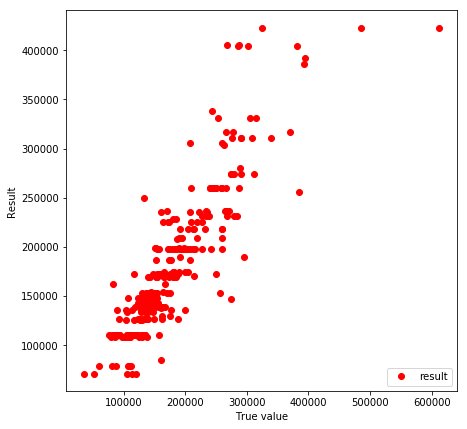

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor object
regressor = DecisionTreeRegressor()

# Create a dictionary for the parameter
params = {'max_depth':[i for i in range(5,12)]}

reg = fit_model(X_train,y_train,regressor,params)


### Random Forest

The random forest algorithm is more or less similiar to the decision tree algorithm. It is also a tree structure while some of the branch can be ignored. The difference is that the random forest algorithm do not need every node to do some decisions. And the it can spand far more deeper than the decision tree regressor without consuming a lot of time. 

The *n_estimators* defines the number of trees in the forest. The *min_samples_split* defines minimum split for an internal node.


The best estimator is: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
The r2 score is: 0.8665677873300971


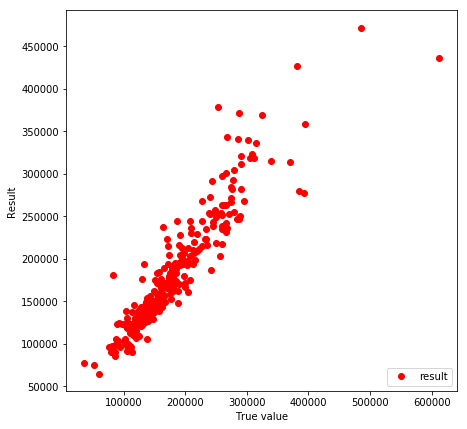

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor object
regressor = RandomForestRegressor()

# Create a dictionary for the parameter
params = {'n_estimators':[100,200,300],'min_samples_split':[2,5,8,15]}

reg = fit_model(X_train,y_train,regressor,params)

### K Nearest Neighbors
Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

The *K Nearest Neighbors* is not so good compared to former two algorithms. It may be the data labels are not so continuous to each other. 

The *n_neighbors* defines number of neighbors to use for kneighbors queries. The default *weights* is *uniform* which assign equal weights to all points while *distance* will assigns weights proportional to the inverse of the distance from the query point. The *leaf_size* is passed to BallTree or KDTree.


The best estimator is: KNeighborsRegressor(algorithm='auto', leaf_size=5, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')
The r2 score is: 0.7287031307439509


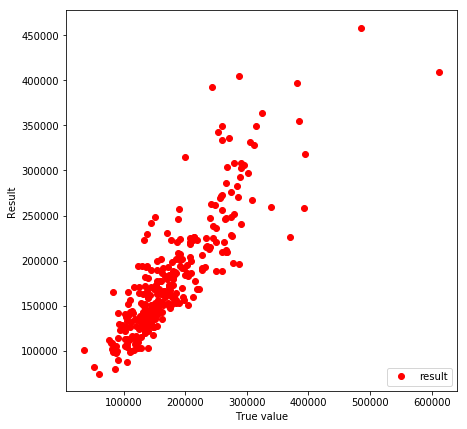

In [15]:
from sklearn.neighbors import KNeighborsRegressor

# Create a random forest regressor object
regressor = KNeighborsRegressor()

# Create a dictionary for the parameter
params = {'n_neighbors':[2,5,20,100],'weights':['uniform','distance'],'leaf_size':[2,5,10,30]}

reg = fit_model(X_train,y_train,regressor,params)

### Bagging Meta-estimator

In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm. As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

<img src="https://pic1.zhimg.com/v2-d52bf7631aaeb5f2739a27922a89b7e4_r.jpg" width = "500" height = "350" alt="bagging" align=center />

The best estimator is: BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=0.8, max_samples=0.8, n_estimators=15,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)
The r2 score is: 0.8604135765329084


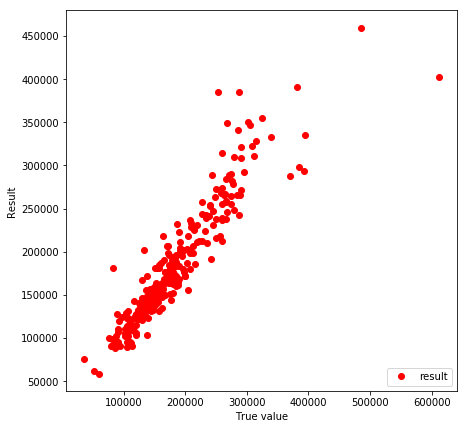

In [16]:
from sklearn.ensemble import BaggingRegressor

# Create a random forest regressor object
regressor = BaggingRegressor()

# Create a dictionary for the parameter
params = {'n_estimators':[5,10,15,20],'max_samples':[0.8,0.9,1,3],'max_features':[0.8,0.9,1,3]}
# params={}

reg = fit_model(X_train,y_train,regressor,params)

### Random Sample Consensus

RANSAC (RANdom SAmple Consensus) fits a model from random subsets of inliers from the complete dataset.

The *min_samples* defines minimum number of samples chosen randomly from original data.  This RANSAC will find the best *max_trials* and *stop_probability* itself. 


The best estimator is: RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=0.4, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
The r2 score is: 0.859271259448365


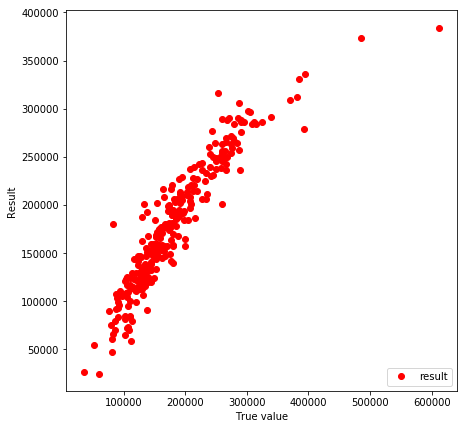

In [17]:
from sklearn.linear_model import RANSACRegressor

# Create a random forest regressor object
regressor = RANSACRegressor()

# Create a dictionary for the parameter
params={'min_samples':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]}

reg = fit_model(X_train,y_train,regressor,params)

### Gradient Boosting

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

To understand it intuitively the decision tree can be regarded as a piecewise function, which divides the feature space into multiple independent regions and predicts a constant in each region.

<img src="https://pic4.zhimg.com/80/v2-3b7c0a8b3fab3046aa69daa83c13c007_720w.jpg" width = "400" height = "200" alt="Gradient Boosting" align=center />

The best estimator is: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
The r2 score is: 0.8952534197956037


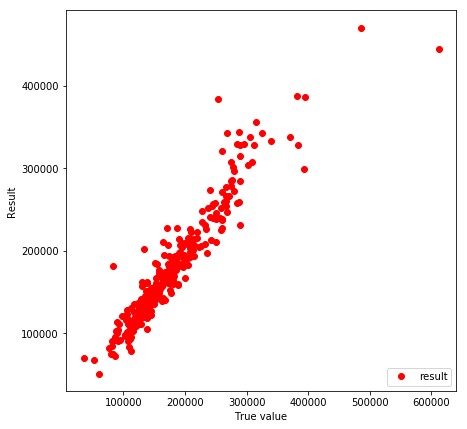

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a random forest regressor object
regressor = GradientBoostingRegressor()

# Create a dictionary for the parameter
params={}

reg = fit_model(X_train,y_train,regressor,params)

### Stochastic Gradient Descent

Stochastic Gradient Descent is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though Stochastic Gradient Descent has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

The stochastic gradient descent is said to better get trained with a dataset that contains more than 100k data. It is shown that this method is not so good compared to the perivous regression methods. Because the peak may not be so obvious for the stochastic gradient descent algorithm to detect.

The best estimator is: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
The r2 score is: -1.961450866873471e+24


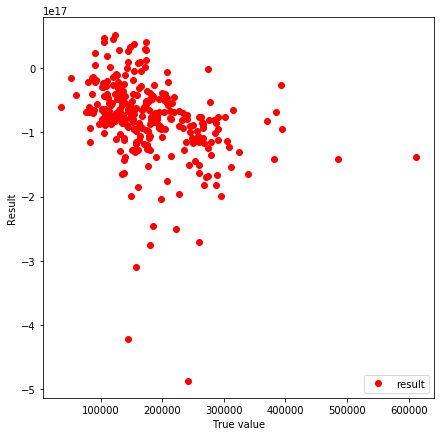

In [19]:
from sklearn.linear_model import SGDRegressor

# Create a random forest regressor object
regressor = SGDRegressor()

# Create a dictionary for the parameter
params={}

reg = fit_model(X_train,y_train,regressor,params)

## Conclusions

The data cleaning and processing is really time consuming for this project. Although we have already choose a dataset which is very clean it is not all numerical representation. The step of translating them into numerical data takes us a big percent of effort for this project. For the data processing we also need to be careful not to make the string data which are incontinuous to become continuous which may include some orders not appearing in the dataset.

From all the method we tested the algorithm Gradient Boosting Regressor is the best algorithm for this problem. Like the random forests, gradient boosting is also a set of decision trees.

The method of building the trees are different. random forests builds each tree independently while gradient boosting builds one tree at a time. This additive model (ensemble) works in a forward stage-wise manner, introducing a weak learner to improve the shortcomings of existing weak learners. They also combine the result in the different ways. Random forests combine results at the end of the process (by averaging or "majority rules") while gradient boosting combines results along the way.

For the next step we can try using all the data form this dataset. Some of them are ignored due to their lack of generalization but they might be significant in the real world, just hard for the algorithm to detect.